In [1]:
import pandas as pd
import numpy as np
import dateutil
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import re
import pickle

from seaborn import plt
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import mutual_info_regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV

from sklearn.linear_model import SGDRegressor

from sklearn.grid_search import GridSearchCV


from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 90)
pd.set_option('display.precision', 10)

%matplotlib inline

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [49]:
with open('df.pkl', 'r') as f:
    df = pickle.load(f)

# take columns that have corr greater than 0.1
df_rating = df[['gross', 'budget', 'Adventure', 'PG', 'runtime', 'R']]
df_rating.columns = ['y', 'x0', 'x1', 'x2', 'x3', 'x4']

# standardized
# df_rating = df_rating.apply(lambda x : (x - np.mean(x))/np.std(x))
X = np.array(df_rating.ix[:, 1:])
y = np.array(df_rating.ix[:, 0])
    

# create train and test set using KFold
kf = KFold(n_splits = 5)
kf.split(df_rating)

for train_index, test_index in kf.split(X):
    X = np.array(df_rating.ix[:, 1:])
    y = np.array(df_rating.ix[:, 0])
    
    X_train = X[train_index] 
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    df_train = df_rating.iloc[train_index, :]
    df_test = df_rating.iloc[test_index, :]

In [50]:
corr_gross = df.corr()['gross']
corr_gross.sort(inplace= False, ascending= False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


gross        1.0000000000
budget       0.6649793137
numvote      0.6374302182
Adventure    0.3469673476
PG           0.2550159047
runtime      0.2528244048
rating       0.2176408314
Family       0.2092516041
Animation    0.2043638419
Action       0.1989003109
Fantasy      0.1742278133
Sci-Fi       0.1477676140
G            0.1062104670
aspect       0.1006102265
Musical      0.0334041935
roi          0.0237992493
Comedy       0.0078094050
Western     -0.0038833069
War         -0.0046963536
Sport       -0.0061288089
History     -0.0249679807
Music       -0.0282890411
Mystery     -0.0302496510
Thriller    -0.0437381125
Biography   -0.0557928058
Romance     -0.0592715068
Crime       -0.0926299065
Horror      -0.1093038625
Drama       -0.2035453702
R           -0.2851865700
Film-Noir             NaN
Name: gross, dtype: float64

In [32]:
df_rating

,y,x0,x1,x2,x3,x4
16,47095453,48000000,0,1,118,0
254,51600000,18000000,0,0,160,1
256,2150000,1500000,0,0,99,1
269,4000000,2000000,0,1,88,0
279,26400000,16000000,1,1,164,0
283,8800000,18000000,0,1,122,0
294,10600000,4500000,0,0,97,1
295,210609762,19000000,1,1,116,0
296,21000000,44000000,1,1,80,0
297,9929000,15000000,0,0,132,1


In [51]:
# define error and plot fns
def RMSE(y_test, y_predict):
    RMSE = (sum((y_predict - y_test)**2)/len(y_test))**0.5
    return RMSE

def plot_predict(y_test, y_predict):
    fig, ax = plt.subplots(1, 1, figsize = (10, 5))
    
    ax.scatter(y_test, y_predict, alpha = 0.5)
    ax.plot(np.linspace(min(y_test), max(y_test), 2), np.linspace(min(y_test), max(y_test), 2), 'r--')
    ax.set_xlabel('y_test', fontsize = 20)
    ax.set_ylabel('y_predict', fontsize = 20)   
    #ax.set_aspect("equal")
    ax.set_title(('RMSE = ' + str(RMSE(y_test, y_predict)) + '| RSquared = ' + str(calc_RSquared(y_test, y_predict))), fontsize = 20)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    
def calc_RSquared(y_test, y_predict):
    SS_total = np.sum((y_test - np.mean(y_test))**2)
    SS_res = np.sum((y_test - y_predict)**2)
    return (1 - SS_res/SS_total)

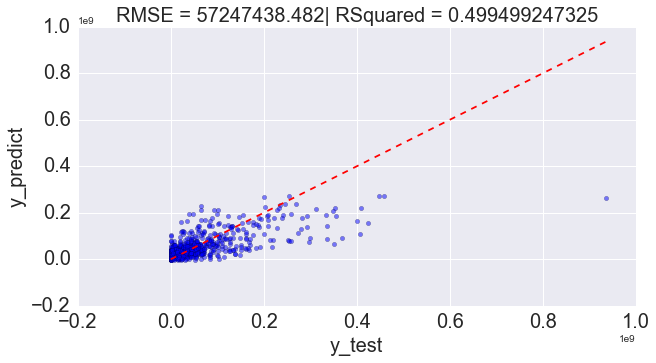

In [52]:
# basic linear regression
reg_linreg = LinearRegression()
reg_linreg.fit(X_train, y_train)
y_predict = reg_linreg.predict(X_test)
plot_predict(y_test, y_predict)

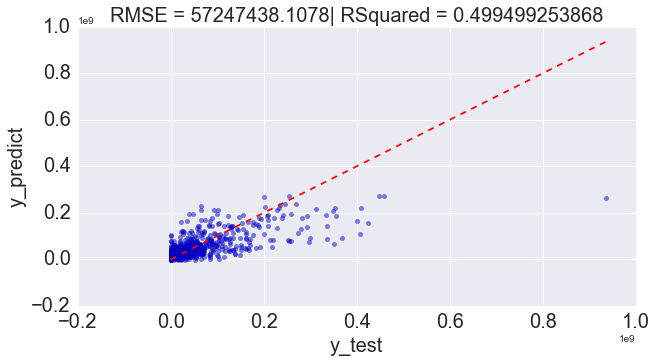

In [53]:
# Lasso
reg_lasso = Lasso(alpha = 1)
reg_lasso.fit(X_train, y_train)
y_predict = reg_lasso.predict(X_test)
plot_predict(y_test, y_predict)

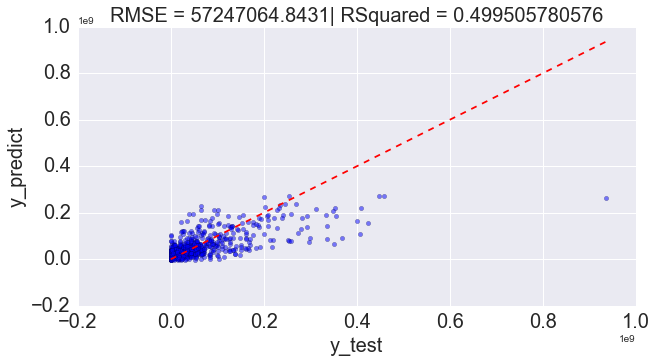

In [66]:
# Lasso CV

reg_lassocv = LassoCV(alphas= [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7])
reg_lassocv.fit(X_train, y_train)
y_predict = reg_lassocv.predict(X_test)
plot_predict(y_test, y_predict)

In [55]:
# best alpha
reg_lassocv.alpha_

1000.0

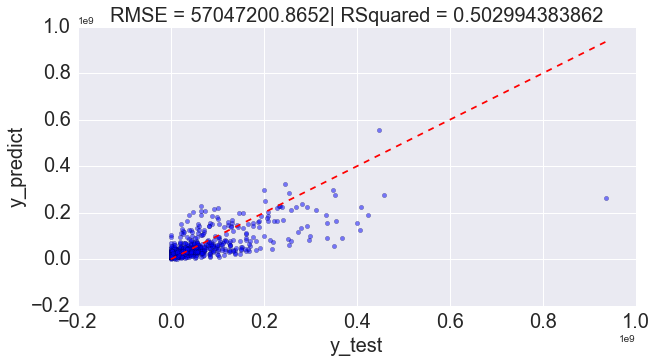

In [68]:
# polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

est_poly = make_pipeline(PolynomialFeatures(3), Lasso(alpha = 1e3))
est_poly.fit(X_train, y_train)
y_predict = est_poly.predict(X_test)
plot_predict(y_test, y_predict)

In [60]:
est_poly.named_steps
lasso1 = est_poly.named_steps['lasso']
poly1 = est_poly.named_steps['polynomialfeatures']
names = poly1.get_feature_names()
coeffs = lasso1.coef_
name_coeffs = list(zip(names, coeffs))

In [44]:
name_coeffs

[('1', 0.0),
 ('x0', 0.29626864481360432),
 ('x1', 17999089.773355301),
 ('x2', 30657809.463000651),
 ('x3', 587698.32407192374),
 ('x4', 4075637.0327725513),
 ('x0^2', -4.3174074255295626e-10),
 ('x0 x1', -0.07504375447936508),
 ('x0 x2', -0.13359312297003806),
 ('x0 x3', 0.0082434399530075444),
 ('x0 x4', -0.56181344074093864),
 ('x1^2', -25321981.100124665),
 ('x1 x2', -8003529.8130425708),
 ('x1 x3', 236723.91684930585),
 ('x1 x4', -21742730.179734059),
 ('x2^2', -10304973.458936961),
 ('x2 x3', -426368.68146599754),
 ('x2 x4', 0.0),
 ('x3^2', -1144.3379397631163),
 ('x3 x4', -385138.79739330948),
 ('x4^2', 12624779.271548359)]

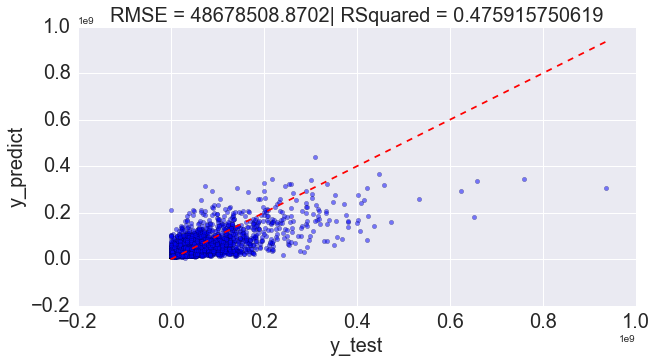

In [65]:
# try statsmodel

# Define the model
lm1 = smf.ols('y ~ x0 + x1 + x2 + x3 + x4 + I(x0*x0) + I(x0*x1)  + I(x0*x2) + \
              + I(x0*x3) + I(x0*x4) + I(x1*x1)+ \
              I(x1*x2) + I(x1*x3) + I(x1*x4) + I(x2*x2) + I(x3*x3)\
              + I(x3*x4) + I(x4*x4)', data=df_rating)

# Fit the model
fit1 = lm1.fit_regularized(L1_wt = 1, alpha=1e3)
# Print summary statistics of the model's performance
fit1.summary()

plot_predict(df_rating['y'], fit1.predict(df_rating))

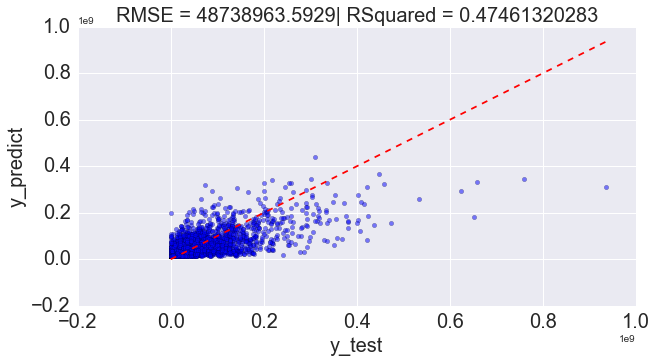

In [48]:
# try statsmodel take 2 select from p value

# Define the model
lm1 = smf.ols('y ~ x0 + x1 + x2 + x4 + I(x0*x1)  + \
              + I(x0*x3) + I(x0*x4) + I(x1**2)+ \
             I(x1*x3)  + I(x2*x2)', data=df_rating)

# Fit the model
#fit1 = lm1.fit_regularized(L1_wt = 1, alpha=1e3)
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

plot_predict(df_rating['y'], fit1.predict(df_rating))

In [ ]:
len(df_test['y'])

In [ ]:
len(fit1.predict(df_test))

In [70]:
# KFold
kf = KFold(n_splits = 5, random_state = 42)

for train_index, test_index in kf.split(X):
    X = np.array(df_rating.ix[:, 1:])
    y = np.array(df_rating.ix[:, 0])
    
    X_train = X[train_index] 
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]
    
    df_train = df_rating.iloc[train_index, :]
    df_test = df_rating.iloc[test_index, :]
    
    # try statsmodel take 2 select from p value

    # Define the model
    #lm1 = smf.ols('y ~ x0 + x1 + x2 + x3 + x4 + I(x0*x0) + I(x0*x1)  + I(x0*x2) + \
    #          + I(x0*x3) + I(x0*x4) + I(x1*x1)+ \
    #          I(x1*x2) + I(x1*x3) + I(x1*x4) + I(x2*x2) + I(x3*x3)\
    ##
    
    #fit1 = lm1.fit_regularized(L1_wt = 1, alpha=1e4)
    # Print summary statistics of the model's performance
    #fit1.summary()

    #plot_predict(df_test['y'], fit1.predict(df_test))
    
    
    est_poly = make_pipeline(PolynomialFeatures(3), Lasso(alpha = 1e3))
    est_poly.fit(X_train, y_train)
    y_predict = est_poly.predict(X_test)
    #plot_predict(y_test, y_predict)
    
    print(calc_RSquared(df_test['y'], fit1.predict(df_test)))

    #      Fit the model
    #fit1 = lm1.fit()
    #      Print summary statistics of the model's performance
    #      print(fit1.summary())

    #plot_predict(df_test['y'], fit1.predict(df_test))
    

0.175148295377
0.44574703386
0.452391592937
0.582333164872
0.513650613406
